In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('FuelConsumption.csv')

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [16]:
df.CO2EMISSIONS.describe()

count    1067.000000
mean      256.228679
std        63.372304
min       108.000000
25%       207.000000
50%       251.000000
75%       294.000000
max       488.000000
Name: CO2EMISSIONS, dtype: float64

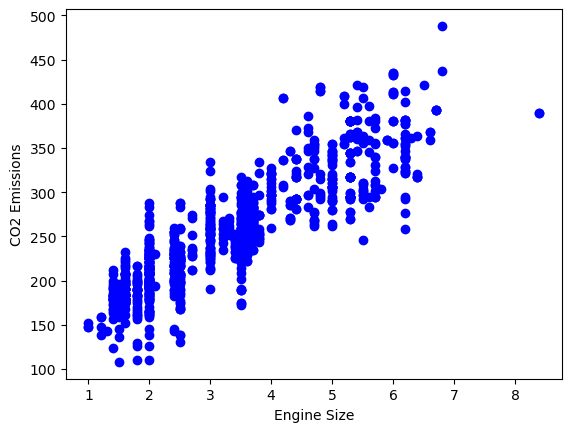

In [29]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
#plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='red')
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")
plt.show()

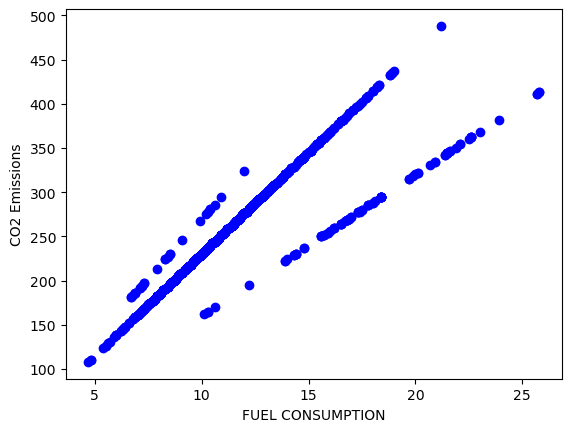

In [28]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue')
plt.ylabel("CO2 Emissions")
plt.xlabel("FUEL CONSUMPTION")
plt.show()

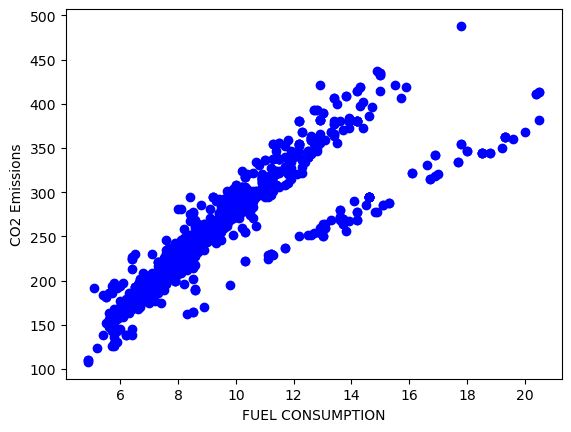

In [30]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS, color='blue')
plt.ylabel("CO2 Emissions")
plt.xlabel("FUEL CONSUMPTION")
plt.show()

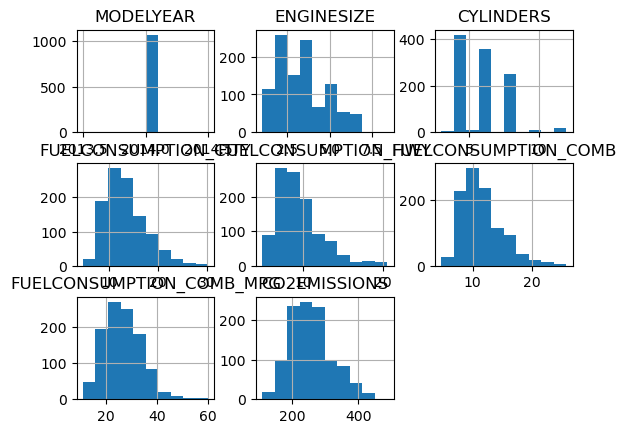

In [201]:
cdf = df.select_dtypes(include=(np.number))
columns = cdf.columns
cdf.hist()
plt.show()

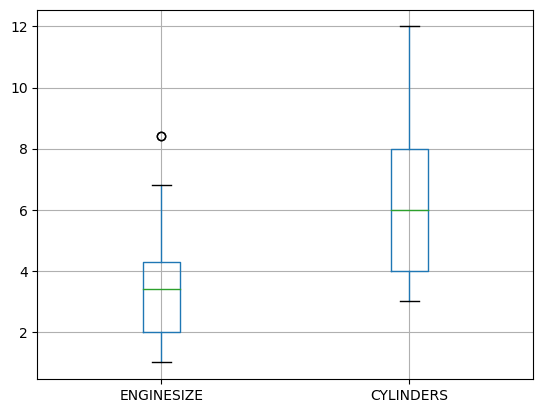

In [202]:
cdf.boxplot(column=["ENGINESIZE", "CYLINDERS"])
plt.show()

In [151]:
columns

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

## Normalize the data

In [203]:
from sklearn import preprocessing

x = cdf.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cdf = pd.DataFrame(x_scaled)

In [153]:
cdf

,0,1,2,3,4,5,6,7
0,0.0,0.135135,0.111111,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.0,0.189189,0.111111,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.0,0.067568,0.111111,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.0,0.337838,0.333333,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.0,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895
...,...,...,...,...,...,...,...,...
1062,0.0,0.270270,0.333333,0.343750,0.314103,0.336493,0.265306,0.428947
1063,0.0,0.297297,0.333333,0.335938,0.294872,0.322275,0.285714,0.410526
1064,0.0,0.270270,0.333333,0.343750,0.314103,0.336493,0.265306,0.428947
1065,0.0,0.297297,0.333333,0.324219,0.282051,0.312796,0.285714,0.400000


In [204]:
cdf.columns = columns

In [205]:
cdf

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.0,0.135135,0.111111,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.0,0.189189,0.111111,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.0,0.067568,0.111111,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.0,0.337838,0.333333,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.0,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895
...,...,...,...,...,...,...,...,...
1062,0.0,0.270270,0.333333,0.343750,0.314103,0.336493,0.265306,0.428947
1063,0.0,0.297297,0.333333,0.335938,0.294872,0.322275,0.285714,0.410526
1064,0.0,0.270270,0.333333,0.343750,0.314103,0.336493,0.265306,0.428947
1065,0.0,0.297297,0.333333,0.324219,0.282051,0.312796,0.285714,0.400000


## Creating Train and Test

In [206]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [192]:
train.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
5,2014,3.5,6,11.9,7.7,10.0,28,230


In [125]:
test.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
4,0.0,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895
6,0.0,0.337838,0.333333,0.281250,0.205128,0.255924,0.346939,0.326316
10,0.0,0.189189,0.111111,0.257812,0.205128,0.241706,0.367347,0.307895
11,0.0,0.337838,0.333333,0.292969,0.217949,0.270142,0.326531,0.344737
16,0.0,0.500000,0.555556,0.500000,0.410256,0.473934,0.163265,0.605263


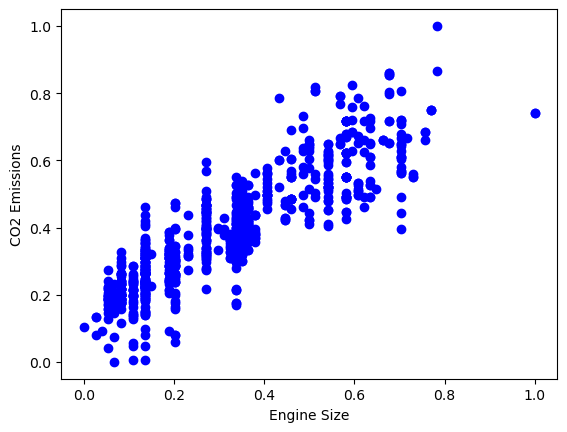

In [171]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
#plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='red')
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")
plt.show()

In [160]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = train[["ENGINESIZE"]]
y = train[["CO2EMISSIONS"]]
regr.fit(X, y)

LinearRegression()

In [207]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)
regr.fit(X, y)

LinearRegression()

In [208]:
regr.coef_

array([ 0.        ,  0.19187849,  0.15877852, -0.33812464, -0.0378595 ,
        0.53496971, -0.47374507])

In [209]:
regr.intercept_

0.3800306537559951

In [163]:
X_test = test[["ENGINESIZE"]]
y_test = test[['CO2EMISSIONS']]
y_predict = regr.predict(X_test)

In [210]:
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

#X_test = poly.fit_transform(X_test)
y_predict = regr.predict(X_test)

In [211]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_predict))
print(regr.score(X_test, y_test))

0.8914811500239079
0.8914811500239079
